# Implementation will feature pyCombinatorial

In [1]:
pip install pyCombinatorial

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os

# algorithm
from pyCombinatorial.algorithm import branch_and_bound

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.uniform(0, 500, size=(n, 2))

def display_distance_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.round(2))
    
def create_distance_matrix(cities):
    return cdist(cities, cities, metric='euclidean')

In [4]:
cities = generate_cities(20)
dist_matrix = create_distance_matrix(cities)
pd.DataFrame(dist_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,250.86,412.11,163.78,165.99,177.24,434.42,395.57,215.86,330.99,422.61,295.07,92.26,235.10,465.07,407.12,154.75,303.99,427.95,298.57
1,250.86,0.00,363.21,362.53,85.29,401.23,199.58,344.65,217.04,214.79,237.31,248.71,166.53,269.49,284.79,222.93,376.65,156.98,329.26,82.77
2,412.11,363.21,0.00,358.45,354.58,412.55,339.38,18.82,198.72,153.64,228.07,125.28,348.53,180.45,224.97,225.88,399.05,519.88,79.82,299.90
3,163.78,362.53,358.45,0.00,282.79,55.15,506.74,346.95,210.45,342.91,456.82,275.95,203.07,189.68,489.25,443.24,41.50,454.69,403.54,378.67
4,165.99,85.29,354.58,282.79,0.00,318.42,273.53,335.81,174.46,224.93,284.34,230.34,82.13,222.89,330.84,268.79,293.83,189.04,339.30,140.26
5,177.24,401.23,412.55,55.15,318.42,0.00,555.21,401.43,263.92,396.81,509.70,330.91,236.52,244.80,543.09,495.87,24.59,479.37,458.66,424.58
6,434.42,199.58,339.38,506.74,273.53,555.21,0.00,325.63,306.84,204.10,116.15,280.91,342.71,350.55,145.89,114.38,531.83,305.38,270.07,135.89
7,395.57,344.65,18.82,346.95,335.81,401.43,325.63,0.00,181.32,136.19,216.13,106.82,330.66,165.66,216.41,212.96,387.17,501.24,74.88,282.11
8,215.86,217.04,198.72,210.45,174.46,263.92,306.84,181.32,0.00,133.08,246.50,79.43,150.72,52.55,279.20,233.17,243.46,359.82,213.54,194.65
9,330.99,214.79,153.64,342.91,224.93,396.81,204.10,136.19,133.08,0.00,117.68,79.36,247.27,161.00,146.34,106.54,376.54,371.58,115.84,146.48


In [6]:
# This implementation thus far is for undirected TSP as dist_matrix[i][j] == dist_matrix[j][i])
# Later on I might make it an asymmetric distance matrix, as in dist_matrix[i][j] ≠ dist_matrix[j][i]

In [5]:
# path
results_file = "branch_and_bound_results.csv"
# samples ran
num_samples = 1
# cities being tested
city_sizes = [4]

if os.path.exists(results_file):
    saved_df = pd.read_csv(results_file)
    if 'samples' not in saved_df.columns:
        saved_df['samples'] = 1
    print("Resuming from saved file...")
else:
    saved_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'samples'])
    print("Starting new benchmark...")

for size in city_sizes:
    print(f"\nProcessing {size} cities ({num_samples} samples)...")
    
    # Arrays for runtime and distance
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        cities = generate_cities(size, seed=42)
        dist_matrix = create_distance_matrix(cities)
        
        try:
            start = time.time()
            route, distance = branch_and_bound(dist_matrix)
            runtime = (time.time() - start) * 1000
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes:
        avg_runtime = round(np.mean(runtimes), 2)  
        avg_distance = round(np.mean(distances), 2) 
        
        existing = saved_df[saved_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + num_samples
            new_runtime = round((old_runtime * old_samples + avg_runtime * num_samples) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * num_samples) / total_samples, 2)
            
            saved_df.loc[saved_df['cities'] == size, ['runtime_ms', 'distance', 'samples']] = [
                new_runtime, new_distance, total_samples
            ]
        else:
            # New entry
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'samples': num_samples
            }])
            saved_df = pd.concat([saved_df, new_row], ignore_index=True)
        
        saved_df['distance'] = saved_df['distance'].apply(lambda x: round(float(x), 2))
        saved_df['runtime_ms'] = saved_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        saved_df.to_csv(results_file, index=False, float_format='%.2f')
        
        print(f"Updated averages for {size} cities (Total samples: {saved_df.loc[saved_df['cities'] == size, 'samples'].values[0]})")

# Output
saved_df['distance'] = saved_df['distance'].map('{:.2f}'.format)
saved_df['runtime_ms'] = saved_df['runtime_ms'].map('{:.2f}'.format)
print("\n Completed")
print(saved_df)

Resuming from saved file...

Processing 4 cities (1 samples)...
Sample 1: 1.00 ms | Distance: 1136.30
Updated averages for 4 cities (Total samples: 7)

 Completed
    cities distance   runtime_ms  samples
0        5  1136.73         1.07        6
1       10  1491.54       142.76        6
2       15  1604.70     15799.44        6
3        4  1136.30         0.89        7
4        8  1388.41        11.42        6
5       12  1486.25       603.54        6
6       16  1637.78     94236.64        1
7       20  1932.15  13954024.83        1
8        6  1205.34         2.23        6
9        7  1421.73         5.87        6
10       9  1476.89        42.22        6
11      11  1521.28       265.38        6
12      13  1495.67      1295.74        6
13      14  1527.44      4256.46        6
14      17  1610.33    431211.80        1
15      18  1871.05   1874935.55        1
16      19  1913.07   6359348.74        1


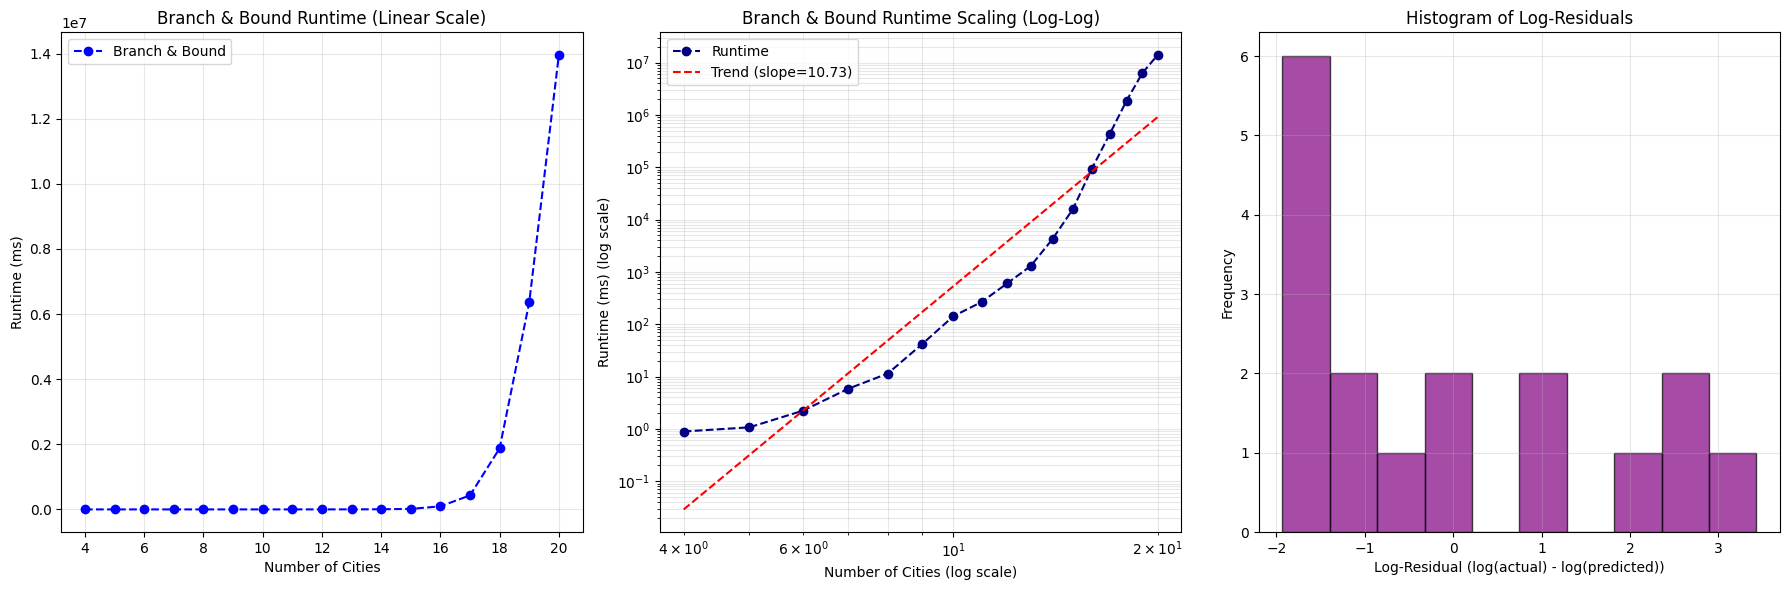

Estimated complexity exponent: 10.73
This suggests exponential growth (O(k^n) behavior)


In [6]:
# File path
results_file = "branch_and_bound_results.csv"

if os.path.exists(results_file):
    df = pd.read_csv(results_file)

    # filter values
    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0]

    # Log-transform
    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    # trendline
    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    residuals = log_runtime - predicted_log_runtime

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Linear-scale plot (Left)
    ax1.plot(df['cities'], df['runtime_ms'],
             marker='o', linestyle='--',
             color='blue', label='Branch & Bound')
    ax1.set_title('Branch & Bound Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Log-log plot and trendline (Middle)
    ax2.loglog(df['cities'], df['runtime_ms'],
               marker='o', linestyle='--',
               color='navy', label='Runtime')
    
    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], trend,
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')
    
    ax2.set_title('Branch & Bound Runtime Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    # histogram of residuals (Left)
    ax3.hist(residuals, bins=10, color='purple', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print estimated complexity
    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 2.5:
        print("This suggests exponential growth (O(k^n) behavior)")
    elif coeffs[0] > 1.5:
        print("This suggests super-polynomial growth (O(n^k) behavior)")
    else:
        print("This suggests polynomial growth")

else:
    print("No saved results found.")

In [13]:
# The reason that Branch & Bound and Held-Karp Algorithms have slightly different distances for some cities, 
# is because the Branch & Bound algorithm has pathing where it prunes the optimal path too early.